# CNN models: regularized

Trying out different regularization techniques to reduce overfitting. I'll introduce:
 - image augmentation to increase variety of dataset
 - L2 regularization
 - batch normalization
 - dropout layers

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2

from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load images for modeling

Use `ImageDataGenerator` class from Keras with `flow_from_directory` method to feed images into the model.

In [3]:
# Image folder for training
train_dir = 'input_images/train'

In [4]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

## CNN2: Image Augmentation

Same architecture as before, but with image aug (like with the NN models I was trying).

In [21]:
# Get data from directories and scale
imgaug_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1,
                                    horizontal_flip=True,
                                    rotation_range=20, 
                                    brightness_range=[0.5, 1.5], 
                                    zoom_range=.2)

imaug_train_gen = imgaug_datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
imaug_val_gen = imgaug_datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [22]:
# Instatiate model
cnn_model_2 = models.Sequential()

# Add model layers
cnn_model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_2.add(MaxPooling2D((2, 2)))
cnn_model_2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))
cnn_model_2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))
cnn_model_2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D((2, 2)))
# Flatten
cnn_model_2.add(Flatten())
# Final Dense layers
cnn_model_2.add(Dense(512, activation='relu'))
cnn_model_2.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [23]:
# Train the model
cnn_history_2 = cnn_model_2.fit(imaug_train_gen,
                                epochs=15, 
                                validation_data=imaug_val_gen)

Epoch 1/15
39/39 [==============================] - 192s 5s/step - loss: 0.6182 - acc: 0.6770 - recall: 0.7233 - precision: 0.6652 - val_loss: 0.4340 - val_acc: 0.8222 - val_recall: 0.9118 - val_precision: 0.7750
Epoch 2/15
39/39 [==============================] - 187s 5s/step - loss: 0.4547 - acc: 0.8173 - recall: 0.7654 - precision: 0.8569 - val_loss: 0.2886 - val_acc: 0.8889 - val_recall: 0.9265 - val_precision: 0.8630
Epoch 3/15
39/39 [==============================] - 203s 5s/step - loss: 0.3856 - acc: 0.8401 - recall: 0.7977 - precision: 0.8741 - val_loss: 0.2925 - val_acc: 0.8889 - val_recall: 0.9559 - val_precision: 0.8442
Epoch 4/15
39/39 [==============================] - 190s 5s/step - loss: 0.3616 - acc: 0.8564 - recall: 0.8317 - precision: 0.8771 - val_loss: 0.2236 - val_acc: 0.9185 - val_recall: 0.9559 - val_precision: 0.8904
Epoch 5/15
39/39 [==============================] - 178s 5s/step - loss: 0.3385 - acc: 0.8646 - recall: 0.8188 - precision: 0.9036 - val_loss: 0.189

In [24]:
cnn_model_2.save('models/cnn_model_2.h5')

Training eval:
39/39 [==============================] - 149s 4s/step - loss: 0.2848 - acc: 0.8793 - recall: 0.7816 - precision: 0.9738

Validation eval:
5/5 [==============================] - 8s 2s/step - loss: 0.1796 - acc: 0.9407 - recall: 0.9118 - precision: 0.9688


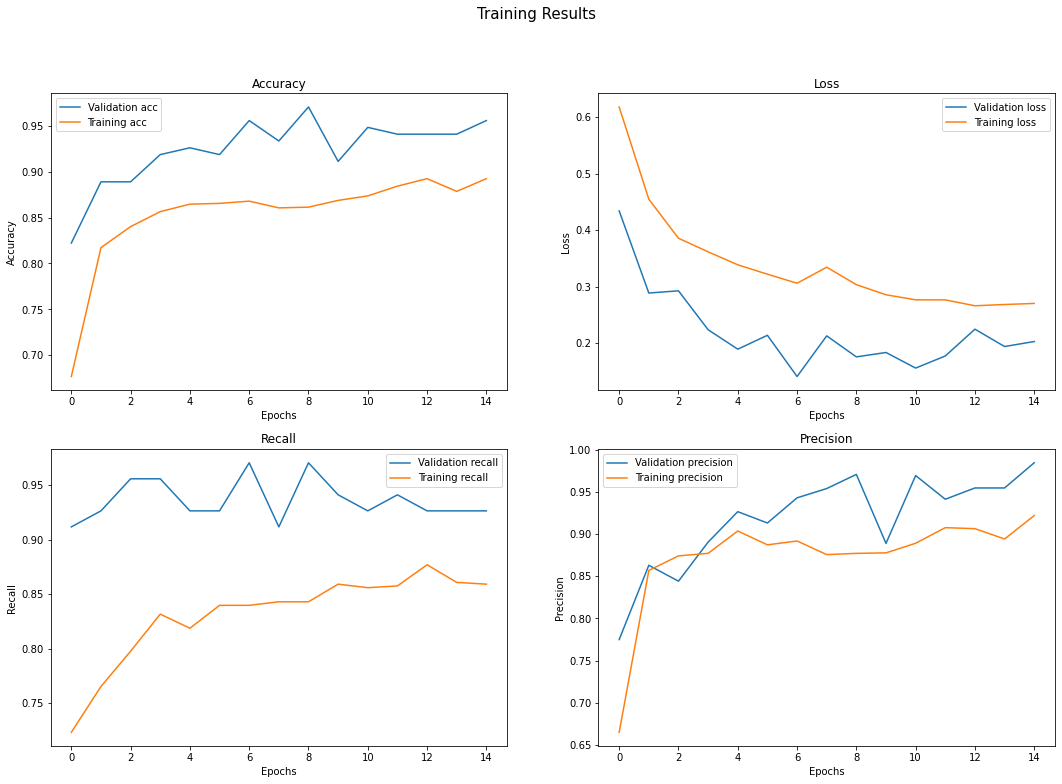

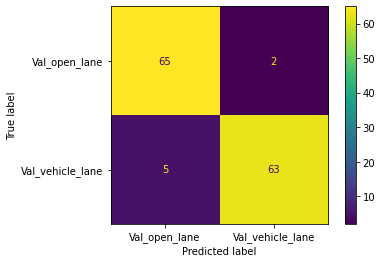

In [25]:
visualize_results(cnn_history_2, cnn_model_2, imaug_train_gen, imaug_val_gen)

In [26]:
dump(cnn_history_2.history, open('models/cnn_history_2.pkl', 'wb'))

## CNN3: Batch Normalization

Adding BatchNormalization layers to increase speed and hopefully regularize a little. Also going to take away one of the convolutional layers.

In [27]:
# Get data from directories and scale
batchnorm_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1,
                                    horizontal_flip=True,
                                    rotation_range=20, 
                                    brightness_range=[0.5, 1.5], 
                                    zoom_range=.2)

batchnorm_train_gen = batchnorm_datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
batchnorm_val_gen = batchnorm_datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [28]:
# Instatiate model
cnn_model_3 = models.Sequential()

# Add model layers
cnn_model_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(MaxPooling2D((2, 2)))
cnn_model_3.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(MaxPooling2D((2, 2)))
cnn_model_3.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_3.add(BatchNormalization())
cnn_model_3.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_3.add(Flatten())
# Final Dense layers
cnn_model_3.add(Dense(512, activation='relu'))
cnn_model_3.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_3.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [29]:
# Train the model
cnn_history_3 = cnn_model_3.fit(batchnorm_train_gen,
                                epochs=15, 
                                validation_data=batchnorm_val_gen)

Epoch 1/15
39/39 [==============================] - 200s 5s/step - loss: 19.9507 - acc: 0.6843 - recall: 0.6521 - precision: 0.7009 - val_loss: 73.0699 - val_acc: 0.4963 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/15
39/39 [==============================] - 205s 5s/step - loss: 2.0444 - acc: 0.7357 - recall: 0.6958 - precision: 0.7597 - val_loss: 10.2850 - val_acc: 0.5407 - val_recall: 0.2941 - val_precision: 0.5882
Epoch 3/15
39/39 [==============================] - 243s 6s/step - loss: 0.7489 - acc: 0.7675 - recall: 0.6926 - precision: 0.8184 - val_loss: 16.4203 - val_acc: 0.5630 - val_recall: 0.7059 - val_precision: 0.5517
Epoch 4/15
39/39 [==============================] - 223s 6s/step - loss: 0.6030 - acc: 0.7863 - recall: 0.7443 - precision: 0.8156 - val_loss: 124.9483 - val_acc: 0.4963 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/15
39/39 [==============================] - 212s 5s/step - loss: 0.4906 - acc: 0.7879 - recall: 0.7298 - precision: 0.

In [30]:
cnn_model_3.save('models/cnn_model_3.h5')

Training eval:
39/39 [==============================] - 148s 4s/step - loss: 0.4881 - acc: 0.8181 - recall: 0.6683 - precision: 0.9582

Validation eval:
5/5 [==============================] - 9s 2s/step - loss: 0.7442 - acc: 0.8593 - recall: 0.8088 - precision: 0.9016


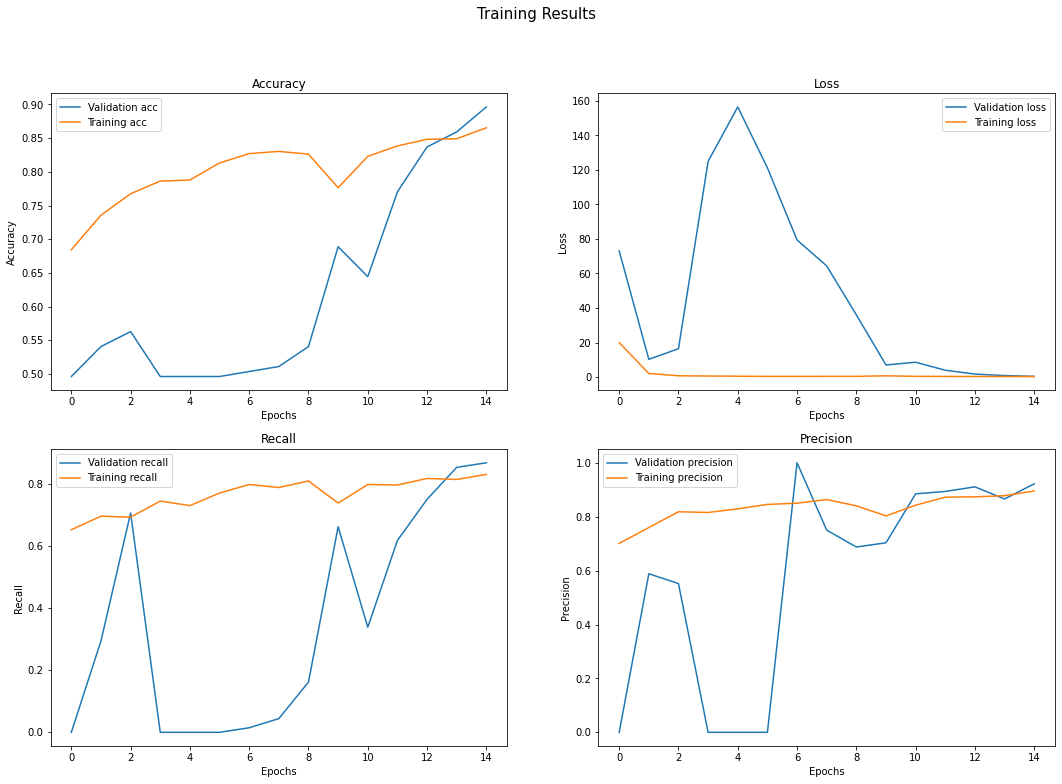

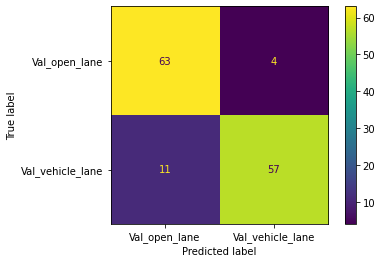

In [31]:
visualize_results(cnn_history_3, cnn_model_3, batchnorm_train_gen, batchnorm_val_gen)

In [32]:
dump(cnn_history_3.history, open('models/cnn_history_3.pkl', 'wb'))

## CNN4: L2 Regularization

Adding l2 regularization to Conv2D layers, reverting to same number of layers as CNN2.

In [33]:
# Get data from directories and scale
l2_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1,
                                    horizontal_flip=True,
                                    rotation_range=20, 
                                    brightness_range=[0.5, 1.5], 
                                    zoom_range=.2)

l2_train_gen = l2_datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
l2_val_gen = l2_datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [34]:
# Instatiate model
cnn_model_4 = models.Sequential()

# Add model layers
cnn_model_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_4.add(MaxPooling2D((2, 2)))
cnn_model_4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_4.add(MaxPooling2D((2, 2)))
cnn_model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_4.add(MaxPooling2D((2, 2)))
cnn_model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_4.add(MaxPooling2D((2, 2)))
# Flatten
cnn_model_4.add(Flatten())
# Final Dense layers
cnn_model_4.add(Dense(512, activation='relu'))
cnn_model_4.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_4.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [35]:
# Train the model
cnn_history_4 = cnn_model_4.fit(l2_train_gen,
                                epochs=15,
                                validation_data=l2_val_gen)

Epoch 1/15
39/39 [==============================] - 196s 5s/step - loss: 2.0740 - acc: 0.6142 - recall: 0.6392 - precision: 0.6124 - val_loss: 1.1775 - val_acc: 0.8296 - val_recall: 0.8676 - val_precision: 0.8082
Epoch 2/15
39/39 [==============================] - 207s 5s/step - loss: 0.9787 - acc: 0.8042 - recall: 0.7783 - precision: 0.8236 - val_loss: 0.7112 - val_acc: 0.8593 - val_recall: 0.9118 - val_precision: 0.8267
Epoch 3/15
39/39 [==============================] - 183s 5s/step - loss: 0.7306 - acc: 0.8287 - recall: 0.7686 - precision: 0.8764 - val_loss: 0.5549 - val_acc: 0.9259 - val_recall: 0.9118 - val_precision: 0.9394
Epoch 4/15
39/39 [==============================] - 177s 5s/step - loss: 0.6018 - acc: 0.8369 - recall: 0.8010 - precision: 0.8654 - val_loss: 0.4638 - val_acc: 0.9333 - val_recall: 0.9118 - val_precision: 0.9538
Epoch 5/15
39/39 [==============================] - 178s 5s/step - loss: 0.5198 - acc: 0.8524 - recall: 0.8188 - precision: 0.8800 - val_loss: 0.451

In [36]:
cnn_model_4.save('models/cnn_model_4.h5')

Training eval:
39/39 [==============================] - 150s 4s/step - loss: 0.3436 - acc: 0.8711 - recall: 0.7913 - precision: 0.9440

Validation eval:
5/5 [==============================] - 9s 2s/step - loss: 0.2513 - acc: 0.9407 - recall: 0.9118 - precision: 0.9688


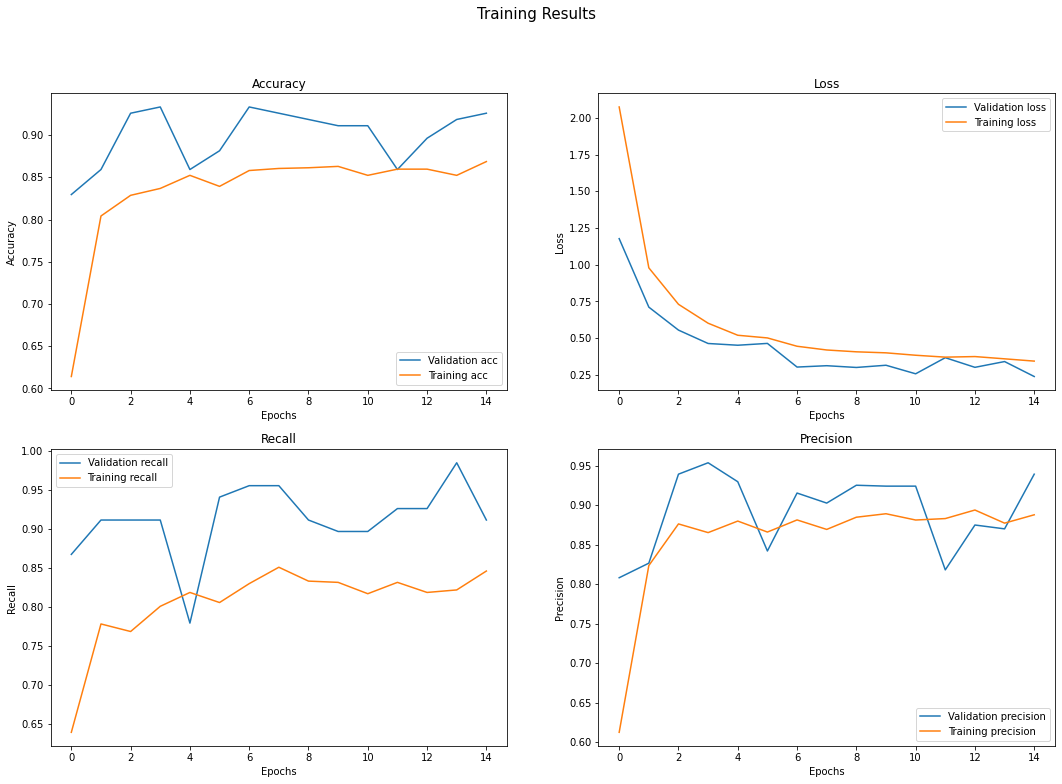

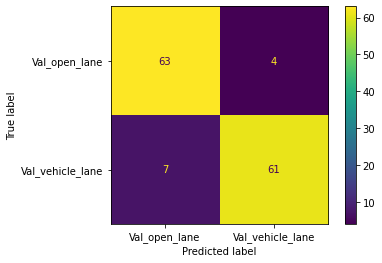

In [37]:
visualize_results(cnn_history_4, cnn_model_4, l2_train_gen, l2_val_gen)

In [38]:
dump(cnn_history_4.history, open('models/cnn_history_4.pkl', 'wb'))

## CNN5: Dropout Layers

I explored my models with [Lime](https://github.com/marcotcr/lime) and I'm concerned that although they're making the right decisions most of the time, they're doing it for the wrong reasons. I'm thinking that this is the result of my dataset being very small and the model is overfitting. I'm going to explore some methods for reducing overfitting even futher, such as Dropout layers, as well as experiment in another notebook with transfer learning from a pre-trained model available online.

For my next iteration, I'll use the architecture given for a similar scenario involving a small dataset and a binary classification problem at https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html.

In [47]:
# Get data from directories and scale
dropout_datagen = ImageDataGenerator(rescale=1./255, 
                                    validation_split=0.1,
                                    horizontal_flip=True,
                                    rotation_range=20, 
                                    brightness_range=[0.5, 1.5], 
                                    zoom_range=.2)

dropout_train_gen = dropout_datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
dropout_val_gen = dropout_datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [48]:
# Instatiate model
cnn_model_5 = models.Sequential()

# Add model layers
cnn_model_5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_5.add(MaxPooling2D((2, 2)))

cnn_model_5.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model_5.add(MaxPooling2D((2, 2)))

cnn_model_5.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model_5.add(MaxPooling2D((2, 2)))

# Flatten
cnn_model_5.add(Flatten())
# Final Dense layers with Dropout
cnn_model_5.add(Dense(64, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_5.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [49]:
# Train the model
cnn_history_5 = cnn_model_5.fit(dropout_train_gen,
                                epochs=15,
                                validation_data=dropout_val_gen)

Epoch 1/15
39/39 [==============================] - 197s 5s/step - loss: 0.5854 - acc: 0.6900 - recall: 0.7233 - precision: 0.6814 - val_loss: 0.3799 - val_acc: 0.8370 - val_recall: 0.8529 - val_precision: 0.8286
Epoch 2/15
39/39 [==============================] - 289s 7s/step - loss: 0.4792 - acc: 0.7936 - recall: 0.7492 - precision: 0.8253 - val_loss: 0.3466 - val_acc: 0.8593 - val_recall: 0.9265 - val_precision: 0.8182
Epoch 3/15
39/39 [==============================] - 209s 5s/step - loss: 0.4087 - acc: 0.8189 - recall: 0.7783 - precision: 0.8498 - val_loss: 0.3036 - val_acc: 0.9111 - val_recall: 0.8971 - val_precision: 0.9242
Epoch 4/15
39/39 [==============================] - 214s 5s/step - loss: 0.4105 - acc: 0.8263 - recall: 0.7929 - precision: 0.8522 - val_loss: 0.3042 - val_acc: 0.9037 - val_recall: 0.8971 - val_precision: 0.9104
Epoch 5/15
39/39 [==============================] - 241s 6s/step - loss: 0.3799 - acc: 0.8361 - recall: 0.8026 - precision: 0.8626 - val_loss: 0.259

In [50]:
cnn_model_5.save('models/cnn_model_5.h5')

Training eval:
39/39 [==============================] - 143s 4s/step - loss: 0.3011 - acc: 0.8679 - recall: 0.8803 - precision: 0.8608

Validation eval:
5/5 [==============================] - 8s 2s/step - loss: 0.2650 - acc: 0.9037 - recall: 0.9706 - precision: 0.8571


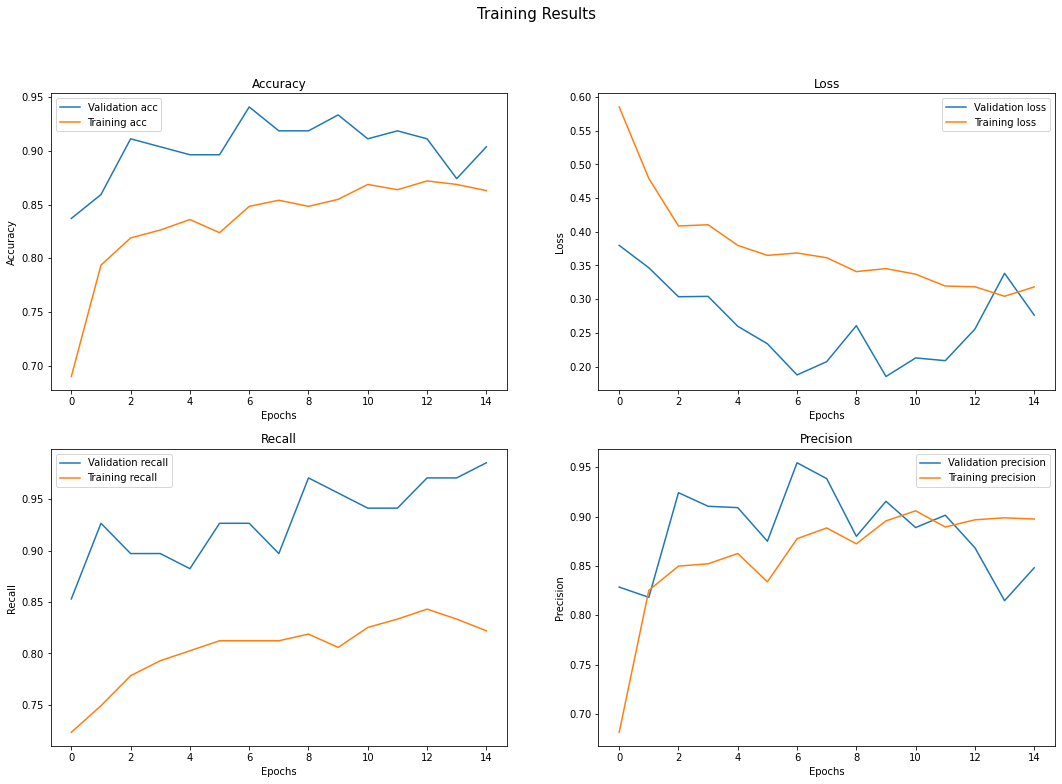

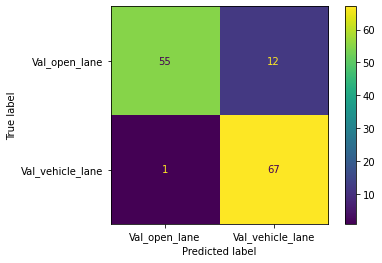

In [51]:
visualize_results(cnn_history_5, cnn_model_5, dropout_train_gen, dropout_val_gen)

In [52]:
dump(cnn_history_5.history, open('models/cnn_history_5.pkl', 'wb'))

Val metrics are still way above training, which is weird. Seems less overfit at least from the training metrics, although there are way more false negatives now than before.